In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde


# matplotlib.use('TkAgg')

In [72]:
vmec_label = "nfp2_QA_cold_high_res"
# vmec_label = "nfp4_QH_warm_high_res"

objective_type="mean_energy"
sampling_type = "grid"
method = "nelder"
s_label = "full"
max_mode = 2
major_radius = 5
tmax = 0.001

# infile = f"./_batch_{vmec_label}_{objective_type}_{sampling_type}_surf_{s_label}_{method}_mmode_{max_mode}_rad_{major_radius}/data_opt_{vmec_label}_{objective_type}_{sampling_type}_surface_{s_label}_tmax_{tmax}_{method}_mmode_{max_mode}_rad_{float(major_radius)}.pickle"
infile = f"./_batch_{objective_type}_{sampling_type}_surf_{s_label}_{method}_mmode_{max_mode}_rad_{major_radius}/data_opt_{objective_type}_{sampling_type}_surface_{s_label}_tmax_{tmax}_{method}.pickle"

indata = pickle.load(open(infile,'rb'))
X = indata['X']
FX = indata['FX'] 
xopt = indata['xopt'] 
aspect_opt = indata['aspect_opt']
c_times_opt = indata['c_times_opt']
major_radius = indata['major_radius']
max_mode = indata['max_mode']
vmec_input = indata['vmec_input']
objective_type = indata['objective_type'] 
sampling_type = indata['sampling_type'] 
sampling_level = indata['sampling_level'] 
method =indata['method']
tmax = indata['tmax'] 
print("")
print(vmec_input)

FileNotFoundError: [Errno 2] No such file or directory: './_batch_mean_energy_grid_surf_full_nelder_mmode_2_rad_5/data_opt_mean_energy_grid_surface_full_tmax_0.001_nelder.pickle'

In [69]:
# set sim failures to inf
FX[~np.isfinite(FX)] = np.inf

In [70]:
Energy = lambda t:  3.5*np.exp(-2*t/tmax)

# Progress plots

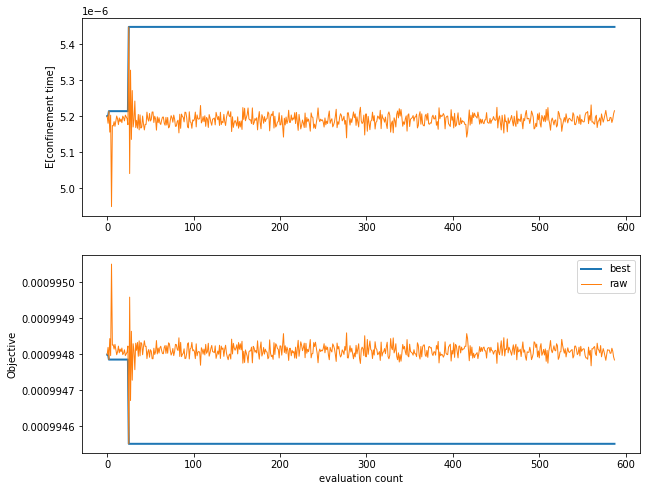

In [71]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
if objective_type == "mean_time":
    # plot expected confinement time
    GX = tmax - FX
    ax1.set_ylabel("E[confinement time]")
    ax1.plot(np.maximum.accumulate(GX),linewidth=2,label='best')
    ax1.plot(GX,linewidth=1,label='raw')
    # plot objective
    ax2.plot(np.minimum.accumulate(FX),linewidth=2,label='best')
    ax2.plot(FX,linewidth=1,label='raw')
    ax2.set_ylabel("Objective")
elif objective_type == "mean_energy":
    # plot expected confinement time
    GX = -tmax*np.log(FX/3.5)/2
    ax1.set_ylabel("E[confinement time]")
    ax1.plot(GX,linewidth=1,label='raw')
    ax1.plot(np.maximum.accumulate(GX),linewidth=2,label='best')
    # plot objective
    ax2.plot(np.minimum.accumulate(FX),linewidth=2,label='best')
    ax2.plot(FX,linewidth=1,label='raw')
    ax2.set_ylabel("E[energy retained]")

plt.xlabel("evaluation count")
plt.legend()

# Distribution of Confinement Times

In [60]:
# performance of optima
print("mean confinement time")
print(np.mean(c_times_opt))
print("")
print("std confinement time")
print(np.std(c_times_opt))
print("")
print("std mean confinement time estimator")
print(np.std(c_times_opt)/np.sqrt(len(c_times_opt)))
print("")
print("loss fraction")
print(np.mean(c_times_opt < tmax))
print("")
print("mean energy retained")
print(np.mean(Energy(c_times_opt)))
print("std energy ")
print(np.std(Energy(c_times_opt)))
print("")
print("std mean energy estimator")
print(np.std(Energy(c_times_opt))/np.sqrt(len(c_times_opt)))

mean confinement time
1.7790227697573172e-05

std confinement time
9.701735047773197e-06

std mean confinement time estimator
3.0679580006445786e-07

loss fraction
1.0

mean energy retained
2.498021978214122
std energy 
0.47524505538448436

std mean energy estimator
0.01502856821747839


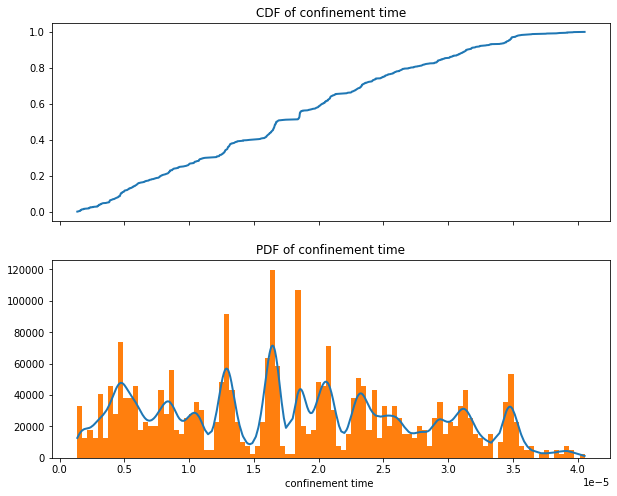

In [61]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize = (10,8),sharex = True)
# colors = cm.jet(np.linspace(0, 1, n_directions+1))

# kernel lengthscale
kernel_bw = 5e-2
bins = 100

# make the cdf
c_times = np.sort(c_times_opt)
cdf = np.cumsum(np.ones(len(c_times)))/len(c_times)
ax1.plot(c_times,cdf,linewidth=2)

# plot the pdf
kernel = gaussian_kde(c_times,bw_method=kernel_bw)
ax2.plot(c_times,kernel(c_times),linewidth=2)
ax2.hist(c_times,bins=bins,density=True)

ax1.set_title("CDF of confinement time")
ax2.set_title("PDF of confinement time")
plt.xlabel('confinement time ')
# plt.xscale('log')
# plt.xlim(1e-6,1e-3)
plt.show()


# Loss Profile

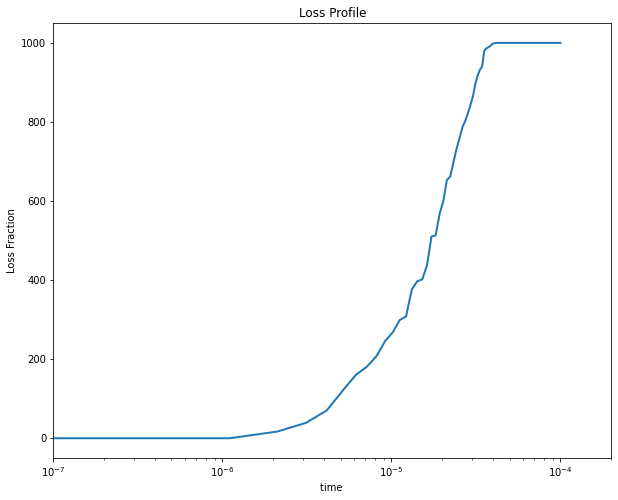

In [62]:
# loss profile
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8))

# make the loss profile
times = np.linspace(1e-7,tmax,100)
loss_profile = np.array([np.sum(c_times< t) for t in times]) 

plt.plot(times,loss_profile,linewidth=2)
plt.title("Loss Profile")
plt.xlabel('time ')
plt.ylabel("Loss Fraction")
plt.xscale('log')
plt.xlim(1e-7,2*tmax)
# plt.legend()
plt.show()


# Gradient 

In [ ]:
# # load the gradient evals
# gradient_evals = indata['gradient_at_xopt']
# grad_opt = gradient_evals['grad_xopt']
# grad_asp = gradient_evals['grad_aspect_xopt'] 
# grad0 = gradient_evals['grad_x0']


In [ ]:
# print('grad(xopt)')
# grad_opt
# print(np.linalg.norm(grad_opt))
# print('grad_aspect(xopt)')
# grad_asp
# print(np.linalg.norm(grad_asp))
# print('grad(x0)')
# grad0
# print(np.linalg.norm(grad0))

In [ ]:
# plt.figure(figsize = (10,8))
# colors = cm.jet(np.linspace(0, 1, n_directions))

# # down select indexes
# n_down =  10000
# idx_down = np.random.randint(0,n_particles,n_down)

# for ii in range(n_directions): 
#     # plot it
#     plt.plot(T,np.mean(FX[ii][:,idx_down],axis=1),'-s',markersize=0,linewidth=2,color=colors[ii],label=f'dir {ii}')

# plt.ylabel('function value')
# plt.xlabel('distance from x0')
# # plt.xscale('symlog', linthresh=1e-2)
# plt.yscale('log')
# plt.title("mean confinement time")
# # plt.xlim(-0.5,0.5)
# # plt.ylim(3e-6,4e-6)
# plt.legend()
# plt.show()
